# Importing Librarires

In [38]:
import math
import re
import os
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,HuberRegressor,TheilSenRegressor,LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error

# Loading Datasets

In [39]:
pd.set_option('display.max_columns',None)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#train = train.sample(frac=1)

In [97]:
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [102]:
#train.info()
print("The mean is: \n",train.mean())
print("--"*60)
print("The standard deviation is: \n",train.std())

The mean is: 
 UNDER_CONSTRUCTION           0.179756
RERA                         0.317918
BHK_NO.                      2.392279
SQUARE_FT                19802.170190
READY_TO_MOVE                0.820244
RESALE                       0.929578
LONGITUDE                   21.300255
LATITUDE                    76.837695
TARGET(PRICE_IN_LACS)      142.898746
dtype: float64
------------------------------------------------------------------------------------------------------------------------
The standard deviation is: 
 UNDER_CONSTRUCTION       3.839908e-01
RERA                     4.656753e-01
BHK_NO.                  8.790913e-01
SQUARE_FT                1.901335e+06
READY_TO_MOVE            3.839908e-01
RESALE                   2.558613e-01
LONGITUDE                6.205306e+00
LATITUDE                 1.055775e+01
TARGET(PRICE_IN_LACS)    6.568807e+02
dtype: float64


C:\Users\anish\AppData\Local\Temp\ipykernel_23156\2467097019.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("The mean is: \n",train.mean())
C:\Users\anish\AppData\Local\Temp\ipykernel_23156\2467097019.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("The standard deviation is: \n",train.std())


# Feature Engineering

In [41]:
add = []
for i in train["ADDRESS"]:
    add.append(i.split(",")[1])

In [42]:
for i in add:
    if i == '':
        print(add.index(i))

In [43]:
train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [44]:
train["add"] = add

In [45]:
train = train.drop("ADDRESS",axis = 1)

In [46]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
add                      0
dtype: int64

In [47]:
x_train = train.drop('TARGET(PRICE_IN_LACS)',axis = 1)
y_train = train["TARGET(PRICE_IN_LACS)"]

In [48]:
x_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,add
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,Lake View Recidency
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,Chennai


In [49]:
def address_to_index(col):
    address = x_train[col]
    address = address.tolist()
    distinct_address = list(set(address))
    idx = [i for i in range(len(distinct_address))]
    #print(distinct_address, idx)
    add_to_idx = dict(zip(distinct_address, idx))
    return add_to_idx

In [50]:
x1 = np.array(x_train)
        

In [51]:
add_dict = address_to_index('add')


In [52]:
for i in range(len(x1)):
    a = (x1[i][10])
    x1[i][10] = add_dict[a]

In [53]:
print(x1)

[['Owner' 0 0 ... 12.96991 77.59796 47]
 ['Dealer' 0 0 ... 12.274538 76.644605 218]
 ['Owner' 0 0 ... 12.778033 77.632191 47]
 ...
 ['Dealer' 0 0 ... 26.928785 75.828002 18]
 ['Owner' 0 0 ... 12.90015 80.22791 61]
 ['Dealer' 0 1 ... 26.832353 75.841749 18]]


In [54]:
x_train = pd.DataFrame(x1, columns = ['POSTED_BY' ,'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.' ,'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE' ,'LONGITUDE', 'LATITUDE','add'])

In [55]:
x_train1 = pd.get_dummies(x_train, columns = ['POSTED_BY','BHK_OR_RK'])

# Droping similar features using Pearson Correlation

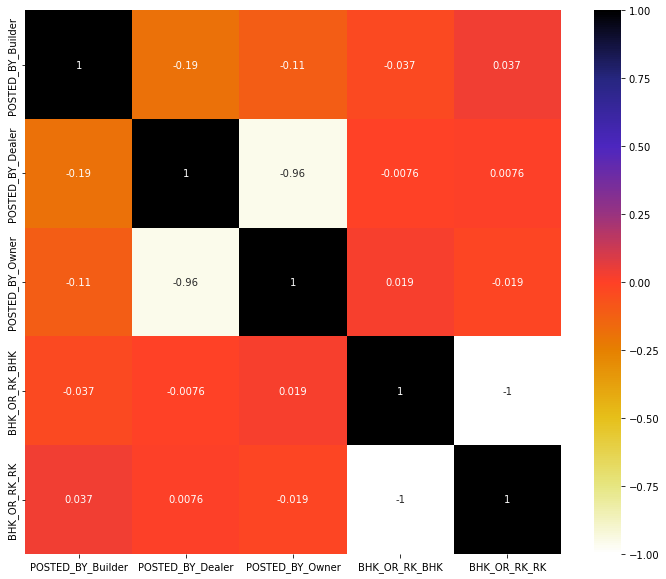

In [56]:
plt.figure(figsize=(12,10))
cor = x_train1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [57]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(x_train1, 0.85)
print(len(set(corr_features)))
print(corr_features)

2
{'BHK_OR_RK_RK', 'POSTED_BY_Owner'}


In [59]:
x_train1 = x_train1.drop(corr_features,axis = 1)

# Preprocessing Data

In [60]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
trans1 = StandardScaler()
trans2 = MinMaxScaler()



In [61]:
x_train1 = trans2.fit_transform(trans1.fit_transform(x_train1))

In [62]:
print(y_train)

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64


In [63]:
y_train = np.array(y_train)

In [64]:
print(y_train)

[55.  51.  43.  ... 27.1 67.  27.8]


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x_train1,y_train,test_size = 0.1)

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly =  PolynomialFeatures(degree = 2, include_bias = False)
poly_features_train = poly.fit_transform(x_train)
poly_features_val = poly.transform(x_val)

In [67]:
#poly_features = poly_features.reshape(29451,-1)

In [68]:
#poly_features = trans2.fit_transform(trans1.fit_transform(poly_features))

In [69]:
print(poly_features_train.shape)

(26505, 90)


# Selecting from the baseline models based on the rmsle score of Validation Dataset

In [73]:
poly_reg_model1 = RandomForestRegressor()
poly_reg_model2 = KNeighborsRegressor()
poly_reg_model3 = DecisionTreeRegressor()
poly_reg_model6 = LassoLars( fit_intercept = False,positive = True)
models = [poly_reg_model1,poly_reg_model2,poly_reg_model3,poly_reg_model6]

In [74]:
res_train=[]
res_val=[]
for i in models:
    sentiment_fit = i.fit(poly_features_train, y_train)
    y_pred1 = sentiment_fit.predict(poly_features_val)
    y_pred2 = sentiment_fit.predict(poly_features_train)
    rmsle1 = np.sqrt(mean_squared_log_error(y_val,y_pred1 ))
    rmsle2 = np.sqrt(mean_squared_log_error(y_train,y_pred2 ))
    res_val.append((rmsle1,i))
    res_train.append((rmsle2,i))

C:\Users\anish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.216e+01, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\anish\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.107e+01, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '


In [76]:
print(res_val)

[(0.36215492274287614, RandomForestRegressor()), (0.5277739567554569, KNeighborsRegressor()), (0.4414612918337271, DecisionTreeRegressor()), (0.9576134857526751, LassoLars(fit_intercept=False, positive=True))]


In [77]:
a = 2
for i in res_val:
    if i[0]<a:
        final_model = i[1]
        a = i[0]
    

In [82]:
print("The final model and corresponding rmsle score of validation_dataset is:",(final_model,a))

The final model and corresponding rmsle score of validation_dataset is: (RandomForestRegressor(), 0.36215492274287614)


In [83]:
final_model.fit(poly_features_train,y_train)
y_pred_train = final_model.predict(poly_features_train)
y_pred_val = final_model.predict(poly_features_val)

# Visualizing model's performance

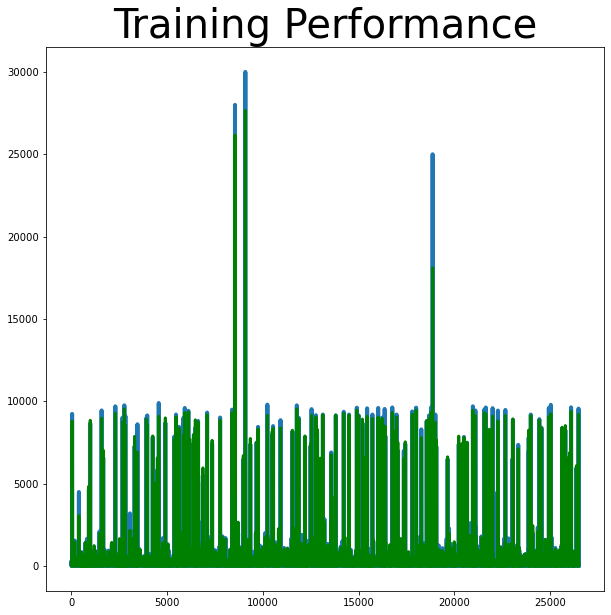

In [91]:
plt.figure(figsize = (10,10))
plt.title("Training Performance",fontsize=40)
plt.plot(y_train,linewidth=4, label = "actual values")
plt.plot(y_pred_train,c = 'g', linewidth=3,label = "predicted values")

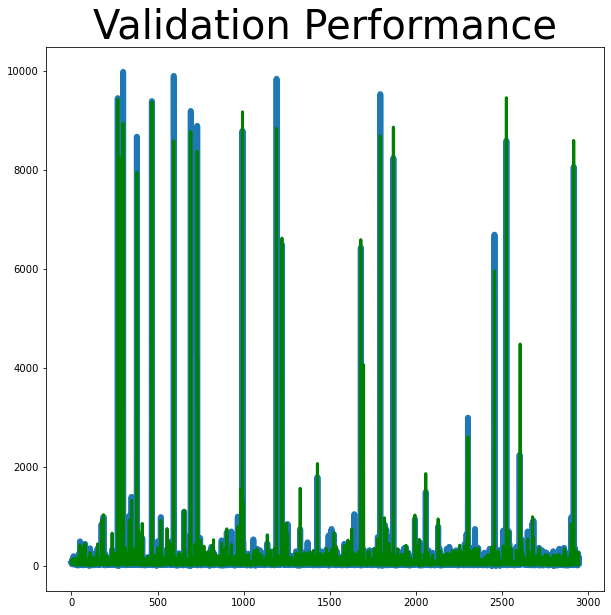

In [92]:
plt.figure(figsize = (10,10))
plt.title("Validation Performance",fontsize=40)
plt.plot(y_val,linewidth=6, label = "actual values")
plt.plot(y_pred_val,c = 'g', linewidth=3,label = "predicted values")